In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 

In [3]:
data = pd.read_csv('D:\Sindhu\Data Analytics\HAP880\cardio_data.csv',sep=';')

In [4]:
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [5]:
#Check for missing values
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [6]:
#Outlier Detection
#Systolic BP(ap_hi) not greater than 370 and not less than 70
#Dialstolic BP(ap_lo) not greater than 360 and not less than 50
outlier = (data['ap_hi'] >= 370)| (data['ap_hi'] <= 70)|(data['ap_lo']>= 360)|(data['ap_lo']<=50)
data[outlier].count()

id             1313
age            1313
gender         1313
height         1313
weight         1313
ap_hi          1313
ap_lo          1313
cholesterol    1313
gluc           1313
smoke          1313
alco           1313
active         1313
cardio         1313
dtype: int64

In [7]:
data = data[~outlier]

In [8]:
# BMI is an important feature in predicting the Cardio vascular disease. As this feature is not available, we can calculate 
# it using Height and Weight.
#First convert Height in metres and square it
def bmi_conversion(x):
    x = (x/100)**2
    return x
data['height1'] = data['height'].apply(lambda x: bmi_conversion(x))
data

C:\Users\Sindhuja\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,height1
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,2.8224
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,2.4336
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,2.7225
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,2.8561
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,2.4336
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0,2.2801
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0,2.4649
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1,3.1684
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0,2.4964
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0,2.6896


In [9]:
data['BMI'] = data['weight']/data['height1']
data['age'] = data['age'].apply(lambda x: round(x/365))
data

C:\Users\Sindhuja\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Sindhuja\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,height1,BMI
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,2.8224,21.967120
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,2.4336,34.927679
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1,2.7225,23.507805
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,2.8561,28.710479
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0,2.4336,23.011177
5,8,60,1,151,67.0,120,80,2,2,0,0,0,0,2.2801,29.384676
6,9,61,1,157,93.0,130,80,3,1,0,0,1,0,2.4649,37.729725
7,12,62,2,178,95.0,130,90,3,3,0,0,1,1,3.1684,29.983588
8,13,48,1,158,71.0,110,70,1,1,0,0,1,0,2.4964,28.440955
9,14,54,1,164,68.0,110,60,1,1,0,0,0,0,2.6896,25.282570


In [10]:
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,height1,BMI
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,2.8224,21.967120
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,2.4336,34.927679
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1,2.7225,23.507805
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,2.8561,28.710479
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0,2.4336,23.011177
5,8,60,1,151,67.0,120,80,2,2,0,0,0,0,2.2801,29.384676
6,9,61,1,157,93.0,130,80,3,1,0,0,1,0,2.4649,37.729725
7,12,62,2,178,95.0,130,90,3,3,0,0,1,1,3.1684,29.983588
8,13,48,1,158,71.0,110,70,1,1,0,0,1,0,2.4964,28.440955
9,14,54,1,164,68.0,110,60,1,1,0,0,0,0,2.6896,25.282570


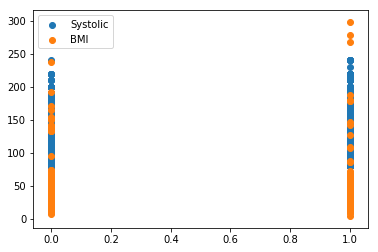

In [11]:
plt.scatter(data['cardio'],pd.to_numeric(data['ap_hi']),label = 'Systolic')
plt.scatter(data['cardio'],data['BMI'],label = 'BMI')            
plt.legend()
plt.show()

In [12]:
cardio = data['cardio']
cardio

0        0
1        1
2        1
3        1
4        0
5        0
6        0
7        1
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       1
16       0
17       0
18       0
19       0
20       0
21       0
22       1
23       0
24       1
25       0
26       0
27       0
28       0
29       0
        ..
69970    1
69971    0
69972    1
69973    0
69974    0
69975    1
69976    0
69977    0
69978    1
69979    1
69980    0
69981    1
69982    1
69983    0
69984    1
69985    1
69986    0
69987    0
69988    0
69989    1
69990    1
69991    0
69992    1
69993    1
69994    1
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 68687, dtype: int64

In [13]:
#Dropping columns ID and Height1 as they are not important and cardio as it is dependent variable
data.drop(['id','height1','cardio'],axis = 1, inplace = True)

C:\Users\Sindhuja\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [14]:
data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,BMI
0,50,2,168,62.0,110,80,1,1,0,0,1,21.967120
1,55,1,156,85.0,140,90,3,1,0,0,1,34.927679
2,52,1,165,64.0,130,70,3,1,0,0,0,23.507805
3,48,2,169,82.0,150,100,1,1,0,0,1,28.710479
4,48,1,156,56.0,100,60,1,1,0,0,0,23.011177
5,60,1,151,67.0,120,80,2,2,0,0,0,29.384676
6,61,1,157,93.0,130,80,3,1,0,0,1,37.729725
7,62,2,178,95.0,130,90,3,3,0,0,1,29.983588
8,48,1,158,71.0,110,70,1,1,0,0,1,28.440955
9,54,1,164,68.0,110,60,1,1,0,0,0,25.282570


In [15]:
#SPlitting the data into training and testing sets
from sklearn.model_selection import train_test_split

In [16]:
X_tr,X_ts,Y_tr,Y_ts = train_test_split(data,cardio,test_size = 0.2,random_state = 0)

In [17]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

C:\Users\Sindhuja\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUC of Logistic Regression: 0.7946327474563338
Accuracy of Logistic Regression: 0.7293638084146163


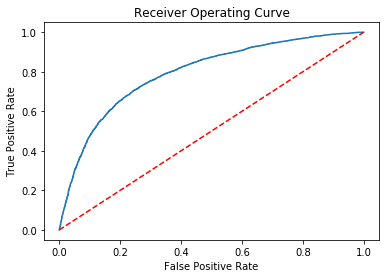

In [18]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_tr,Y_tr)
Y_pred = lr.predict(X_ts)
fpr1,tpr1,thresholds = roc_curve(Y_ts,lr.predict_proba(X_ts)[:,1])
lr_a = auc(fpr1,tpr1)
lr_acc = lr.score(X_ts,Y_ts)
print('AUC of Logistic Regression:',lr_a)
print('Accuracy of Logistic Regression:',lr_acc)
plt.figure()
plt.plot(fpr1,tpr1)
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Curve')
plt.show()

In [19]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
Y_pred = lr.predict(X_ts)
lr_cm = confusion_matrix(Y_ts,Y_pred)
lr_cm

array([[5486, 1485],
       [2233, 4534]], dtype=int64)

In [20]:
#sensitivity calculation
lr_sen = lr_cm[0,0]/(lr_cm[0,0]+lr_cm[0,1])
print('Sensitivity of Logistic regression:',lr_sen)

Sensitivity of Logistic regression: 0.7869746090948214


In [21]:
#GridSearch cross validation for logistic regresssion
from sklearn.model_selection import GridSearchCV
log_reg = LogisticRegression(solver="liblinear")
grid = {"penalty" : ["l1","l2"], "C" : np.arange(10,50,5)}
log_reg_cv = GridSearchCV(log_reg, grid, cv = 3)
log_reg_cv.fit(X_tr,Y_tr)
print("Tuned hyperparameter: {}".format(log_reg_cv.best_params_))

C:\Users\Sindhuja\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Sindhuja\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Sindhuja\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Sindhuja\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Sindhuja\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of

Tuned hyperparameter: {'C': 25, 'penalty': 'l1'}


C:\Users\Sindhuja\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [22]:
#Best model
logreg_best = LogisticRegression(C = 25, penalty = "l1",solver = "liblinear")
logreg_best.fit(X_tr,Y_tr)
probs = logreg_best.predict_proba(X_ts)[:,1]
fpr2,tpr2,thresholds = roc_curve(Y_ts,probs)
lr_best_a = auc(fpr2,tpr2)
lr_best_acc = logreg_best.score(X_ts,Y_ts)

C:\Users\Sindhuja\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


AUC of Logistic Regression(tuned): 0.7946858077428037
Accuracy of Logistic Regression(tuned): 0.7298733440093172


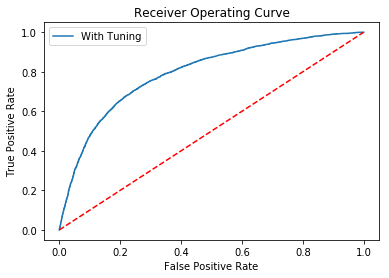

In [23]:
print('AUC of Logistic Regression(tuned):',lr_best_a)
print('Accuracy of Logistic Regression(tuned):',lr_best_acc)
plt.figure()
plt.plot(fpr2,tpr2,label = 'With Tuning')
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Curve')
plt.legend()
plt.show()

In [24]:
#Confusion Matrix for best result and sentivity calculation
from sklearn.metrics import confusion_matrix
Y_pred = logreg_best.predict(X_ts)
log_cm = confusion_matrix(Y_ts,Y_pred)
log_cm
log_sen = log_cm[0,0]/(log_cm[0,0]+log_cm[0,1])
print('Sensitivity of Logistic regression:',log_sen)

Sensitivity of Logistic regression: 0.7875484148615693


In [25]:
#Calibration
from sklearn import metrics
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
lr = LogisticRegression(solver = 'liblinear',C=30)
lr.fit(X_tr,Y_tr)
probs_tr = lr.predict_proba(X_tr)[:,1]
probs_ts = lr.predict_proba(X_ts)[:,1]
cur = calibration_curve(Y_ts,probs_ts,n_bins=10)
cur

(array([0.08280255, 0.13268032, 0.2234375 , 0.31052181, 0.44608567,
        0.59618209, 0.71171875, 0.80325329, 0.84047619, 0.86935287]),
 array([0.07352979, 0.15331071, 0.2521414 , 0.35031604, 0.44748451,
        0.54814911, 0.64847971, 0.75036535, 0.84877153, 0.94211769]))

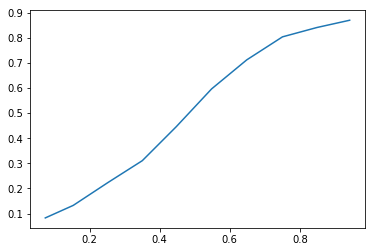

In [26]:
from matplotlib import pyplot as plt
plt.plot(cur[1],cur[0])

In [27]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_tr,Y_tr)
probs = rf.predict_proba(X_ts)[:,1]
fpr1,tpr1,thresholds = roc_curve(Y_ts,probs)
rf_a = auc(fpr1,tpr1)
rf_acc = rf.score(X_ts,Y_ts)
print('AUC of Random Forest:',rf_a)
print('Accuracy of Random Forest:',rf_acc)


C:\Users\Sindhuja\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


AUC of Random Forest: 0.7494193629598542
Accuracy of Random Forest: 0.6959528315620905


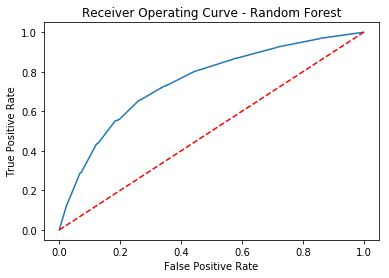

In [28]:
plt.figure()
plt.plot(fpr1,tpr1)
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Curve - Random Forest')
plt.show()

In [29]:
rf.feature_importances_

array([0.15607855, 0.0211454 , 0.13211502, 0.13451234, 0.1686667 ,
       0.106054  , 0.03687694, 0.01907119, 0.00986766, 0.00811436,
       0.01634466, 0.19115318])

In [30]:
res = pd.DataFrame()
res['columns'] = data.columns.tolist()
res['vals'] = rf.feature_importances_

In [31]:
#Order of features which are contributing most to the prediction
res = res.sort_values('vals',ascending = False)
res

,columns,vals
11,BMI,0.191153
4,ap_hi,0.168667
0,age,0.156079
3,weight,0.134512
2,height,0.132115
5,ap_lo,0.106054
6,cholesterol,0.036877
1,gender,0.021145
7,gluc,0.019071
10,active,0.016345


In [32]:
#Finding the AUC on increasing the variables according to their importance. Considering number of trees as 100
r1 = []
for i in range(1,len(res.index)):
    c = list(res[:i]['columns'])
    print(c)
    rf = RandomForestClassifier(n_estimators = 100)
    rf.fit(X_tr[c],Y_tr)
    probs = rf.predict_proba(X_ts[c])[:,1]
    fpr,tpr,thresholds = roc_curve(Y_ts,probs)
    a=auc(fpr,tpr)
    print(a)
    r1.append(a)

['BMI']
0.5771251826557434
['BMI', 'ap_hi']
0.7147337074235453
['BMI', 'ap_hi', 'age']
0.7118902759912887
['BMI', 'ap_hi', 'age', 'weight']
0.730730037678315
['BMI', 'ap_hi', 'age', 'weight', 'height']
0.7289024998051312
['BMI', 'ap_hi', 'age', 'weight', 'height', 'ap_lo']
0.7347337574524212
['BMI', 'ap_hi', 'age', 'weight', 'height', 'ap_lo', 'cholesterol']
0.7528413804603366
['BMI', 'ap_hi', 'age', 'weight', 'height', 'ap_lo', 'cholesterol', 'gender']
0.7569461225257621
['BMI', 'ap_hi', 'age', 'weight', 'height', 'ap_lo', 'cholesterol', 'gender', 'gluc']
0.7597336424496028
['BMI', 'ap_hi', 'age', 'weight', 'height', 'ap_lo', 'cholesterol', 'gender', 'gluc', 'active']
0.7641682889130266
['BMI', 'ap_hi', 'age', 'weight', 'height', 'ap_lo', 'cholesterol', 'gender', 'gluc', 'active', 'smoke']
0.7654349522119303


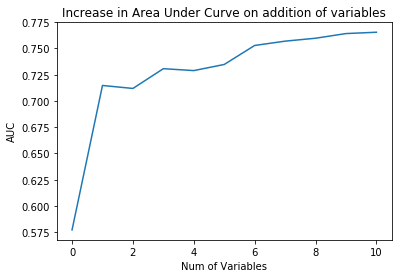

In [33]:
plt.figure()
plt.plot(list(range(len(r1))),r1)
plt.xlabel('Num of Variables')
plt.ylabel('AUC')
plt.title('Increase in Area Under Curve on addition of variables')
plt.show()

In [372]:
#AUC for train set on changing the number of trees
tr_results = []
ts_results = []
for i in range(10,200,10):
    rf = RandomForestClassifier(n_estimators = i,n_jobs = -1)
    rf.fit(X_tr,Y_tr)
    train_pred = rf.predict(X_tr)
    fpr,tpr,thresholds = roc_curve(Y_tr,train_pred)
    roc_auc = auc(fpr,tpr)
    tr_results.append(roc_auc)
#AUC for test set on changing number of trees    
    Y_proba = rf.predict_proba(X_ts)[:,1]
    fpr,tpr,thresholds = roc_curve(Y_ts,Y_proba)
    roc_auc = auc(fpr,tpr)
    ts_results.append(roc_auc)

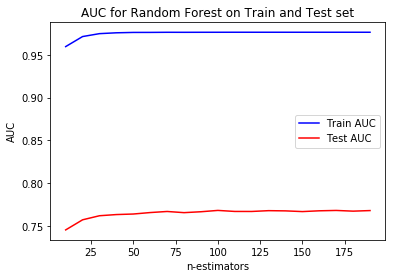

In [373]:
line1 = plt.plot(list(range(10,200,10)),tr_results,'b',label = "Train AUC")
line2 = plt.plot(list(range(10,200,10)),ts_results,'r',label = "Test AUC")
plt.xlabel('n-estimators')
plt.ylabel('AUC')
plt.title('AUC for Random Forest on Train and Test set')
plt.legend()
plt.show()

In [340]:
#ROC on changing the size of train data
r = []
for i in range(1,1000,10):
    s = int(i/1000*len(X_tr.index))
    print(s)
    rf = RandomForestClassifier(n_estimators = 30)
    rf.fit(X_tr[:s],Y_tr[:s])
    probs = rf.predict_proba(X_ts)[:,1]
    fpr,tpr,thresholds = roc_curve(Y_ts,probs)
    a=auc(fpr,tpr)
    print(a)
    r.append(a)

54
0.7467672813781057
604
0.753861937728168
1153
0.7605472476412604
1703
0.7582139623511936
2252
0.7528099110255523
2802
0.7573293415943443
3351
0.7591012223432265
3901
0.7613102303942081
4450
0.7594609956759576
5000
0.7576259640707452
5549
0.7584058739666202
6099
0.7616349199178669
6648
0.7599825785039445
7198
0.7593248471782135
7747
0.7592737053719374
8297
0.7633823055964272
8846
0.7630392792178757
9396
0.7631320234261484
9945
0.7637407328132211
10495
0.7625132022705393
11044
0.7629883917957139
11594
0.7623329605263478
12143
0.764258128902663
12693
0.7618793406541831
13242
0.7633310577967702
13792
0.7662515358175905
14341
0.7643754847739768
14891
0.7644155820699645
15440
0.765656276990552
15990
0.7646998457181546
16539
0.7637245794219745
17089
0.7666554553934594
17638
0.7654866027864347
18188
0.7642146186198107
18737
0.7661316149064596
19287
0.7643511910910783
19836
0.7647564991802367
20386
0.7646166409141615
20935
0.764433388957953
21485
0.764570968366339
22034
0.7617749901707039
22

Text(0.5, 1.0, 'AUC on increasing the size of train data')

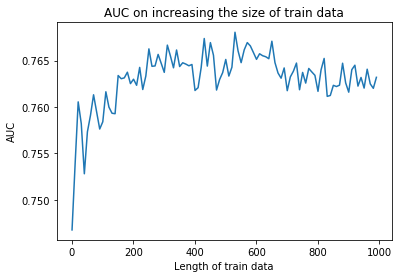

In [341]:
plt.plot(list(range(1,1000,10)),r)
plt.xlabel('Length of train data')
plt.ylabel('AUC')
plt.title('AUC on increasing the size of train data')

In [374]:
parameter_optimizationR={'criterion':('gini','entropy'),
                       'max_depth':(1,2,3,4,5,6), 'max_features':('auto','log2'),'n_estimators':(10,20,30,50,70)}
randomforest_gridcv=GridSearchCV(RandomForestClassifier(),parameter_optimizationR)

In [375]:
randomforest_gridcv.fit(X_tr,Y_tr)

C:\Users\Sindhuja\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ('gini', 'entropy'), 'max_depth': (1, 2, 3, 4, 5, 6), 'max_features': ('auto', 'log2'), 'n_estimators': (10, 20, 30, 50, 70)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [376]:
randomforest_gridcv.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'log2',
 'n_estimators': 20}

In [34]:
rf_best = RandomForestClassifier(n_estimators = 20,max_depth = 6,max_features = 'log2',criterion = 'entropy')
rf_best.fit(X_tr,Y_tr)
probs = rf_best.predict_proba(X_ts)[:,1]
fpr2,tpr2,thresholds = roc_curve(Y_ts,probs)
rf_best_a = auc(fpr2,tpr2)
rf_best_acc = rf_best.score(X_ts,Y_ts)
print('AUC of Random Forest(tuned):',rf_best_a)
print('Accuracy of Random Forest(tuned):',rf_best_acc)

AUC of Random Forest(tuned): 0.7967396202854966
Accuracy of Random Forest(tuned): 0.7297277624108313


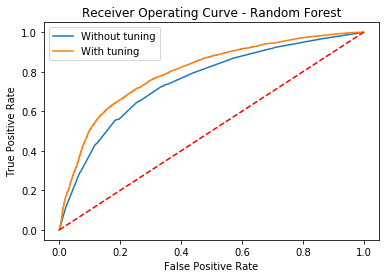

In [193]:
plt.figure()
plt.plot(fpr1,tpr1,label = 'Without tuning')
plt.plot(fpr2,tpr2,label = 'With tuning')
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Curve - Random Forest')
plt.legend()
plt.show()

In [194]:
Y_pred=rf_best.predict(X_ts)

In [195]:
from sklearn.metrics import classification_report,confusion_matrix
cr = classification_report(Y_ts,Y_pred)
rf_cm = confusion_matrix(Y_ts,Y_pred)
rf_sen = rf_cm[0,0]/(rf_cm[0,0]+rf_cm[0,1])
print('Sensitivity of Random Forest:',rf_sen)

Sensitivity of Random Forest: 0.8030411705637641


In [196]:
print("Test Accuracy for best model:",rf_best.score(X_ts,Y_ts))

Test Accuracy for best model: 0.730601252001747


In [343]:
rf_best.feature_importances_

array([0.10450523, 0.00062298, 0.00471422, 0.02082406, 0.46174608,
       0.26220811, 0.10072139, 0.00810332, 0.00117485, 0.00086358,
       0.00277331, 0.03174288])

In [344]:
res = pd.DataFrame()
res['columns'] = data.columns.tolist()
res['vals'] = rf_best.feature_importances_

In [345]:
#Order of features which are contributing most to the prediction
res = res.sort_values('vals',ascending = False)
res

,columns,vals
4,ap_hi,0.461746
5,ap_lo,0.262208
0,age,0.104505
6,cholesterol,0.100721
11,BMI,0.031743
3,weight,0.020824
7,gluc,0.008103
2,height,0.004714
10,active,0.002773
8,smoke,0.001175


In [346]:
r2 = []
accuracy = []
for i in range(1,len(res.index)):
    c = list(res[:i]['columns'])
    print(c)
    rf_best.fit(X_tr[c],Y_tr)
    probs = rf_best.predict_proba(X_ts[c])[:,1]
    fpr,tpr,thresholds = roc_curve(Y_ts,probs)
    a=auc(fpr,tpr)
    acc = rf_best.score(X_ts[c],Y_ts)
    print(a,acc)
    r2.append(a)
    accuracy.append(acc)

['ap_hi']
0.7551615331705119 0.7134954141796477
['ap_hi', 'ap_lo']
0.7587589273190032 0.7142961129713205
['ap_hi', 'ap_lo', 'age']
0.7889498593436038 0.724632406463823
['ap_hi', 'ap_lo', 'age', 'cholesterol']
0.799657342478414 0.7292910176153734
['ap_hi', 'ap_lo', 'age', 'cholesterol', 'BMI']
0.8001363901626525 0.7294365992138594
['ap_hi', 'ap_lo', 'age', 'cholesterol', 'BMI', 'weight']
0.7995555888327663 0.7285631096229437
['ap_hi', 'ap_lo', 'age', 'cholesterol', 'BMI', 'weight', 'gluc']
0.799280165032542 0.7301645072062891
['ap_hi', 'ap_lo', 'age', 'cholesterol', 'BMI', 'weight', 'gluc', 'height']
0.800761507325086 0.730601252001747
['ap_hi', 'ap_lo', 'age', 'cholesterol', 'BMI', 'weight', 'gluc', 'height', 'active']
0.8008836858952298 0.7299461348085602
['ap_hi', 'ap_lo', 'age', 'cholesterol', 'BMI', 'weight', 'gluc', 'height', 'active', 'smoke']
0.8003724692198932 0.7292910176153734
['ap_hi', 'ap_lo', 'age', 'cholesterol', 'BMI', 'weight', 'gluc', 'height', 'active', 'smoke', 'alco

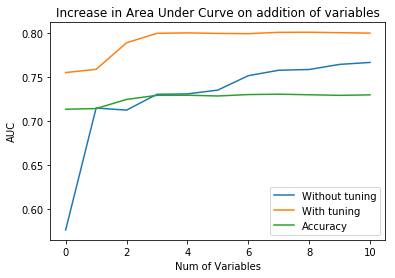

In [347]:
plt.figure()
plt.plot(list(range(len(r1))),r1,label = 'Without tuning')
plt.plot(list(range(len(r2))),r2,label = 'With tuning')
plt.plot(list(range(len(r2))),accuracy,label = 'Accuracy')
plt.xlabel('Num of Variables')
plt.ylabel('AUC')
plt.title('Increase in Area Under Curve on addition of variables')
plt.legend()
plt.show()

In [284]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_tr,Y_tr)
probs = nb.predict_proba(X_ts)[:,1]
fpr,tpr,thresholds = roc_curve(Y_ts,probs)
nb_a = auc(fpr,tpr)
nb_acc = nb.score(X_ts,Y_ts)
print('AUC of Naive Bayes:',nb_a)
print('Accuracy of Naive Bayes:',nb_acc)

AUC of Naive Bayes: 0.7771554458858532
Accuracy of Naive Bayes: 0.7048333090697336


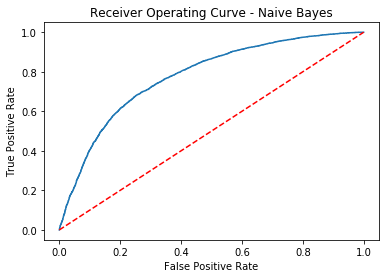

In [285]:
plt.figure()
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Curve - Naive Bayes')
plt.show()

In [286]:
Y_pred = nb.predict(X_ts)
cr = classification_report(Y_ts,Y_pred)
nb_cm = confusion_matrix(Y_ts,Y_pred)
nb_sen = nb_cm[0,0]/(nb_cm[0,0]+nb_cm[0,1])
print('Sensitivity of Naive Bayes:',nb_sen)

Sensitivity of Naive Bayes: 0.8112179027399226


In [164]:
r = []
accuracy = []
for i in range(1,len(res.index)):
    c = list(res[:i]['columns'])
    print(c)
    nb.fit(X_tr[c],Y_tr)
    probs = nb.predict_proba(X_ts[c])[:,1]
    fpr,tpr,thresholds = roc_curve(Y_ts,probs)
    a=auc(fpr,tpr)
    acc = nb.score(X_ts[c],Y_ts)
    print(a,acc)
    r.append(a)
    accuracy.append(acc)

['ap_hi']
0.754196007666035 0.6891104964332508
['ap_hi', 'ap_lo']
0.754357244797034 0.700684233512884
['ap_hi', 'ap_lo', 'age']
0.7837790146545813 0.7075265686417237
['ap_hi', 'ap_lo', 'age', 'cholesterol']
0.7878689918420498 0.7158975105546659
['ap_hi', 'ap_lo', 'age', 'cholesterol', 'BMI']
0.787526050258203 0.715679138156937
['ap_hi', 'ap_lo', 'age', 'cholesterol', 'BMI', 'weight']
0.7821035454849501 0.7132042509826758
['ap_hi', 'ap_lo', 'age', 'cholesterol', 'BMI', 'weight', 'gluc']
0.7749045068533942 0.7049060998689766
['ap_hi', 'ap_lo', 'age', 'cholesterol', 'BMI', 'weight', 'gluc', 'height']
0.7748814214950379 0.7051244722667055
['ap_hi', 'ap_lo', 'age', 'cholesterol', 'BMI', 'weight', 'gluc', 'height', 'active']
0.7759906846233303 0.7052700538651915
['ap_hi', 'ap_lo', 'age', 'cholesterol', 'BMI', 'weight', 'gluc', 'height', 'active', 'smoke']
0.7768414086969732 0.7046149366720047
['ap_hi', 'ap_lo', 'age', 'cholesterol', 'BMI', 'weight', 'gluc', 'height', 'active', 'smoke', 'gend

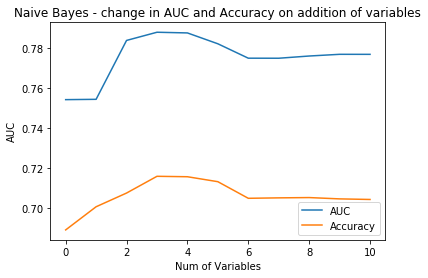

In [203]:
plt.figure()
plt.plot(list(range(len(r))),r,label = 'AUC')
plt.plot(list(range(len(r))),accuracy,label = 'Accuracy')
plt.xlabel('Num of Variables')
plt.ylabel('AUC')
plt.title('Naive Bayes - change in AUC and Accuracy on addition of variables')
plt.legend()
plt.show()

In [204]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_tr,Y_tr)
probs = dt.predict_proba(X_ts)[:,1]
fpr1,tpr1,thresholds = roc_curve(Y_ts,probs)
dt_a = auc(fpr1,tpr1)
dt_acc = dt.score(X_ts,Y_ts)
print('AUC of Decision Tree:',dt_a)
print('Accuracy of Decision Tree:',dt_acc)

AUC of Decision Tree: 0.6421026229185629
Accuracy of Decision Tree: 0.6396855437472704


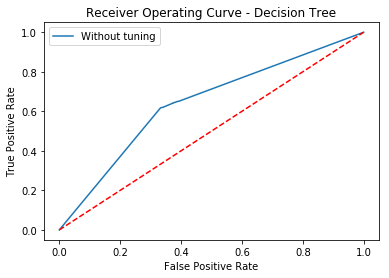

In [205]:
plt.figure()
plt.plot(fpr1,tpr1,label = 'Without tuning')
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Curve - Decision Tree')
plt.legend()
plt.show()

In [168]:
parameters_optimization={'criterion':('gini','entropy'),'max_depth':(1,2,4,5,6,7),
                       'max_features':(1,2,3,4,5,6),'max_leaf_nodes':(2,3,4,5,6)}
dt_gridsearch=GridSearchCV(DecisionTreeClassifier(),parameters_optimization)
dt_gridsearch.fit(X_tr,Y_tr)
dt_gridsearch.best_params_


C:\Users\Sindhuja\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 6,
 'max_leaf_nodes': 5}

In [206]:
dt_best = DecisionTreeClassifier(criterion = 'entropy',max_depth = 4,max_features = 6,max_leaf_nodes = 5)
dt_best.fit(X_tr,Y_tr)
probs = dt_best.predict_proba(X_ts)[:,1]
fpr2,tpr2,thresholds = roc_curve(Y_ts,probs)
dt_best_a = auc(fpr2,tpr2)
dt_best_acc = dt_best.score(X_ts,Y_ts)
print('AUC of Decision Tree(Tuned):',dt_best_a)
print('Accuracy of Decision Tree(Tuned):',dt_best_acc)

AUC of Decision Tree(Tuned): 0.7736053883812642
Accuracy of Decision Tree(Tuned): 0.7137865773766195


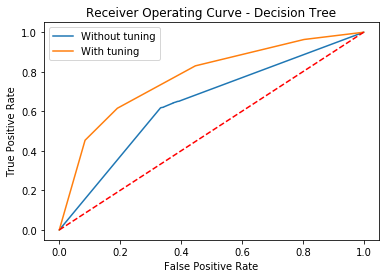

In [207]:
plt.figure()
plt.plot(fpr1,tpr1,label = 'Without tuning')
plt.plot(fpr2,tpr2,label = 'With tuning')
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Curve - Decision Tree')
plt.legend()
plt.show()

In [208]:
Y_pred = dt_best.predict(X_ts)
cr = classification_report(Y_ts,Y_pred)
dt_cm = confusion_matrix(Y_ts,Y_pred)
dt_sen = dt_cm[0,0]/(dt_cm[0,0]+dt_cm[0,1])
print('Sensitivity of Decision Tree:',dt_sen)

Sensitivity of Decision Tree: 0.8092095825563047


In [210]:
#XGBoosting
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_tr,Y_tr)
probs = xgb.predict_proba(X_ts)[:,1]
fpr1,tpr1,thresholds = roc_curve(Y_ts,probs)
xgb_a = auc(fpr1,tpr1)
xgb_acc = xgb.score(X_ts,Y_ts)
print('AUC of XGBoost:',xgb_a)
print('Accuracy of XGBoost:',xgb_acc)

AUC of XGBoost: 0.7998467314513757
Accuracy of XGBoost: 0.7344591643616247


In [177]:
from sklearn.model_selection import StratifiedKFold
learning_rate = [0.0001,0.001,0.01,0.1,0.2,0.3]
n_estimators = [100,200,300,400,500]
param_grid = dict(learning_rate = learning_rate, n_estimators = n_estimators)
kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 7)
grid_search = GridSearchCV(XGBClassifier(),param_grid,scoring = "neg_log_loss",n_jobs = -1,cv = kfold)
grid_search.fit(X_tr,Y_tr)
grid_search.best_params_

{'learning_rate': 0.01, 'n_estimators': 500}

In [178]:
#Finding the best Learning rate and n_estimators 
from sklearn.model_selection import StratifiedKFold
learning_rate= [0.01]
n_estimators = [500]
max_depth = np.arange(3,10)
gamma = [0]
param_grid = dict(learning_rate = learning_rate, n_estimators = n_estimators, max_depth = max_depth,gamma=gamma)
kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 7)
grid_search = GridSearchCV(XGBClassifier(),param_grid,scoring = "neg_log_loss",n_jobs = -1,cv = kfold)
grid_search.fit(X_tr,Y_tr)
grid_search.best_params_

{'gamma': 0, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}

In [211]:
#Best model
xgb_best = XGBClassifier(learning_rate = 0.01,n_estimators = 500,max_depth = 5,gamma = 0)
xgb_best.fit(X_tr,Y_tr)
probs = xgb_best.predict_proba(X_ts)[:,1]
fpr2,tpr2,thresholds = roc_curve(Y_ts,probs)
xgb_best_a = auc(fpr2,tpr2)
xgb_best_acc = xgb_best.score(X_ts,Y_ts)
print('AUC of XGBoost(tuned):',xgb_best_a)
print('Accuracy of XGBoost(tuned):',xgb_best_acc)

AUC of XGBoost(tuned): 0.8054940269868052
Accuracy of XGBoost(tuned): 0.7370796331343719


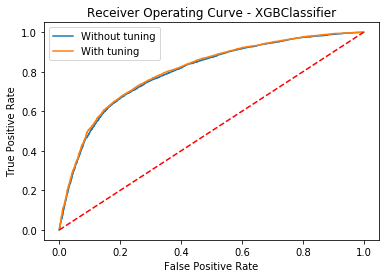

In [212]:
plt.figure()
plt.plot(fpr1,tpr1,label = 'Without tuning')
plt.plot(fpr2,tpr2,label = 'With tuning')
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Curve - XGBClassifier')
plt.legend()
plt.show()

In [213]:
Y_pred = xgb_best.predict(X_ts)
cr = classification_report(Y_ts,Y_pred)
xgb_cm = confusion_matrix(Y_ts,Y_pred)
xgb_sen = xgb_cm[0,0]/(xgb_cm[0,0]+xgb_cm[0,1])
print('Sensitivity of XGBoost:',xgb_sen)

Sensitivity of XGBoost: 0.792712666762301


In [214]:
models = pd.DataFrame({'Model':['Logistic Regression','Random Forest','Naive Bayes','Decision Tree','XGBoost'],
                       'AUC(Without tuning)':[lr_a, rf_a, nb_a,dt_a,xgb_a],
                       'AUC(With tuning)':[lr_best_a,rf_best_a,nb_a,dt_best_a,xgb_best_a],
                       'Accuracy(without tuning)':[lr_acc, rf_acc, nb_acc,dt_acc,xgb_acc],
                       'Accuracy(with tuning)':[lr_best_acc,rf_best_acc,nb_acc,dt_best_acc,xgb_best_acc],
                       'Sensitivity':[log_sen,rf_sen,nb_sen,dt_sen,xgb_sen]})
models.sort_values(by=['Accuracy(with tuning)'],ascending=False)

,Model,AUC(Without tuning),AUC(With tuning),Accuracy(without tuning),Accuracy(with tuning),Sensitivity
4,XGBoost,0.799847,0.805494,0.734459,0.737080,0.792713
1,Random Forest,0.750732,0.799848,0.694497,0.730601,0.803041
0,Logistic Regression,0.794633,0.794700,0.729364,0.729437,0.787548
3,Decision Tree,0.642103,0.773605,0.639686,0.713787,0.809210
2,Naive Bayes,0.777155,0.777155,0.704833,0.704833,0.811218


In [369]:
#Let us consider a record with ap_hi as 150, age as 65, ap_lo = 75(normal),smoke = 1 and all others as zero
age = 25
ap_hi = 130
ap_lo = 80
cholesterol = 1
BMI = 32
weight = 0
gluc = 0
height = 0
active = 0
smoke = 0
alco = 0
gender = 1
d = [age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,BMI]
dat = [d]

In [370]:
dat

[[25, 1, 0, 0, 130, 80, 1, 0, 0, 0, 0, 32]]

In [371]:
rf_best.predict(dat)

array([0], dtype=int64)